## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




In [1]:
import pandas as pd
import numpy as np
import json
import os
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns

# Ex 2
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:

data = 'lalonde.csv'

In [3]:
df = pd.read_csv(data)
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [4]:
df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


## 1.1 Distibution of re78 in function of Treat group

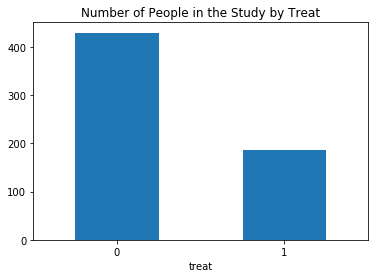

In [5]:
df.groupby('treat').size().plot(kind='bar',rot=0,title='Number of People in the Study by Treat')

By plotting the mean, we see that there is a very large Standard deviation

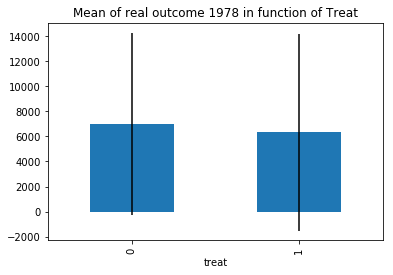

In [6]:
fig, ax = plt.subplots()
errors = df.groupby('treat').re78.std()
df.groupby('treat').re78.mean().plot.bar(yerr=errors, ax=ax,title='Mean of real outcome 1978 in function of Treat')

Indeed there are some outliers with high value and mean and std are not robust to outliers.
But this outliers are only in people that participate to the study

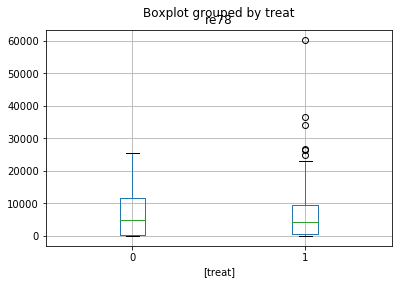

In [7]:
df[['treat','re78']].boxplot(by='treat')

We plot with median and quantile that are resistant to outliers

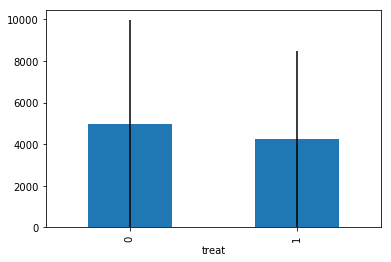

In [8]:
fig, ax = plt.subplots()
errors = df.groupby('treat').re78.quantile()
df.groupby('treat').re78.median().plot.bar(yerr=errors, ax=ax)

In [9]:
#df.groupby[['treat','re78']].corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11abbc470>]], dtype=object)

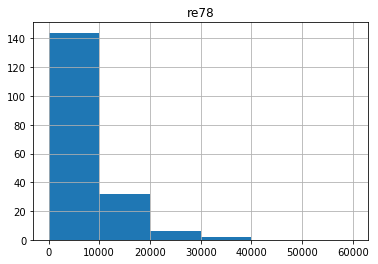

In [10]:
df[df['treat']==1].hist(bins=[0,10000,20000,30000,40000,50000,60000],column=['re78'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11df09908>]], dtype=object)

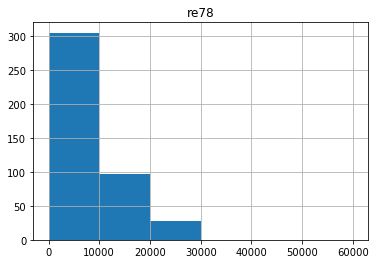

In [11]:
df[df['treat']==0].hist(bins=[0,10000,20000,30000,40000,50000,60000],column=['re78'])

If we look at the distribution we can see that some really people that took the course indeed have a higher outcome, which is not present for the people that did not took the course.
We can then infer that it helps some people to take the course but not all

## 1.2 A closer look at the data


In [12]:
df.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


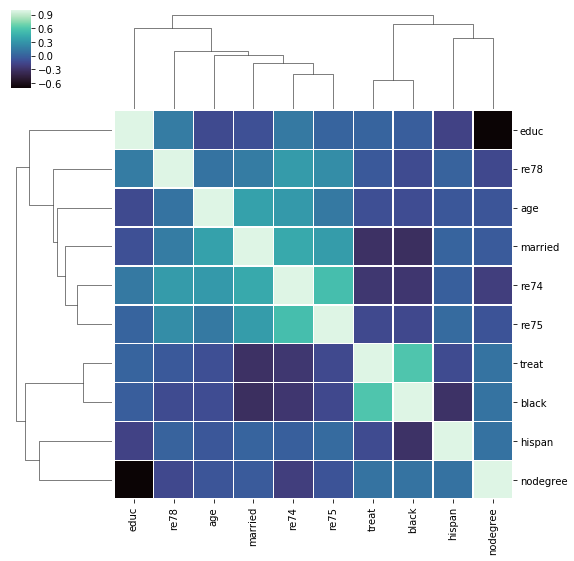

In [13]:
cg = sns.clustermap(df.corr(), linewidth=.5, figsize=(9,9),cmap='mako')
plt.setp(cg)

In [14]:
t1= df[df['treat']==0]
t2 = df[df['treat']==1]
t1.columns = ['id','treat','ageControl','educControl','blackControl','hispanControl','marriedControl','noDegreeControl','re74Control','re75Control','re78Control']
t2.columns = ['id','treat','ageTreated','educTreated','blackTreated','hispTreated','marriedTreated','noDegreeTreated','re74Treated','re75Treated','re78Treated']

We separated the control and treated group so that we can plot both and compare the distribution of each attribiutes

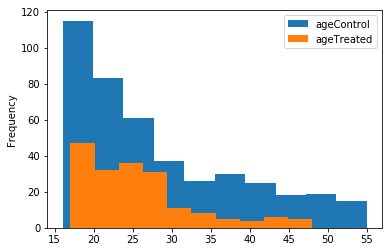

In [15]:
t1.ageControl.plot(kind='hist',legend=True)
t2.ageTreated.plot(kind='hist',legend=True)

So in term of age, the distribion is quite the same except that in the treated group there are really small number of people older than 40 years old and there is no people older than 50, while in the Control group there are some old people ( 50 and older ) and are more equally distributed

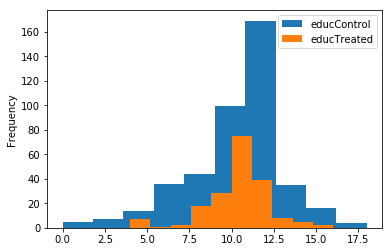

In [16]:
t1.educControl.plot(kind='hist',legend=True)
t2.educTreated.plot(kind='hist',legend=True)

Here the distribution is almost the same again but in the treated group we do not have the sides ( no high years of education ( more than 15) , and no low education year ( no one under 4 years).
In the control group we have people that have no year of education.
So here the problem is that in the treated group you have no people with low year of education, that might influence a lot on the effect of the treatment

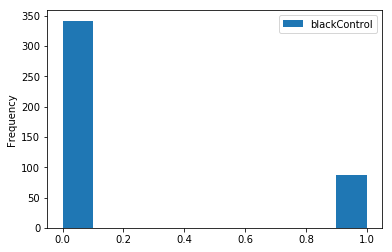

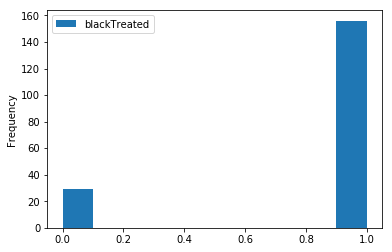

In [17]:
t1.blackControl.plot(kind='hist',legend=True)
plt.show()
t2.blackTreated.plot(kind='hist',legend=True)

We can see that in the treated group a lot of subject are black (150 over 180), while in the control group lot are not (300 over 450)

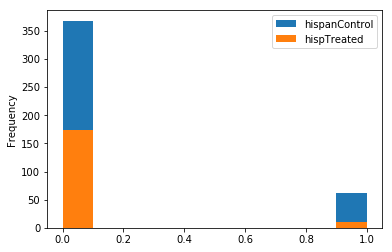

In [18]:
t1.hispanControl.plot(kind='hist',legend=True)

t2.hispTreated.plot(kind='hist',legend=True)

Here there is a little less hispan treated, but the dispartity is not that high, it's just that there is a small amount of hispan in the treated group

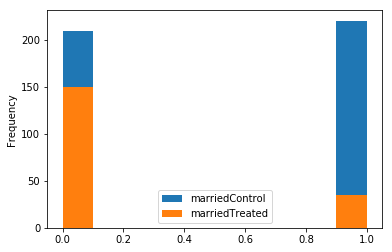

In [19]:
t1.marriedControl.plot(kind='hist',legend=True)
t2.marriedTreated.plot(kind='hist',legend=True)

The number of people married in the control Group is really low

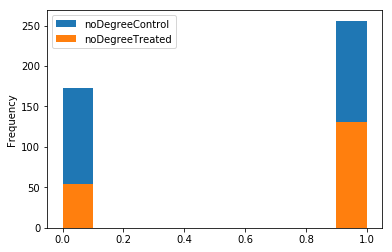

In [20]:
t1.noDegreeControl.plot(kind='hist',legend=True)
t2.noDegreeTreated.plot(kind='hist',legend=True)

The distribution seems to be more or less the same for the two datasets (in proportion)

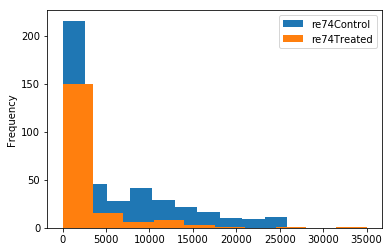

In [21]:
t1.re74Control.plot(kind='hist',legend=True)
t2.re74Treated.plot(kind='hist',legend=True)

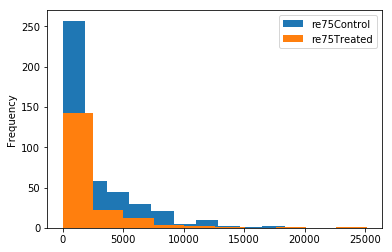

In [22]:
t1.re75Control.plot(kind='hist',legend=True)
t2.re75Treated.plot(kind='hist',legend=True)

So to conclude on the analysis between the two group we can say that some parameters have the same distribution among these groups, but also some features are not distributed the same which could cause some problem in the prediction and analysis of the data.
Particularly, in the age features, there are no people older than 48 years in the treated group. The educatio n features is not balanced either, as there are no people with less than 5 years of education, nor with more than 15 years in the treated group compared to the control group.
Moreover there is a very large number of people in the treated group that are labeled as black ( only 30 not ).
The amount of married people in the treated group is also very low compared to the one in the control group.
Also the re75 features is decreasing faster for the treated group but go further ( some outliers).

### Features to study : age, education, black, married, re74, re75, re78

## 1.3 A propensity score model


In [23]:
feature_cols=['age','educ','black','hispan','married','nodegree','re74','re75','re78']

In [24]:
logistic = linear_model.LogisticRegression()
X = pd.get_dummies(df[feature_cols])
y = df.treat
logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
def getScore(x):
    return logistic.predict_proba(x[feature_cols].reshape(1,-1))[0][1]

In [26]:
df['propensityScore'] = df.apply(lambda row : getScore(row),axis=1)
df.head()

/Users/besmaelketroussi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensityScore
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.458074
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.151980
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.750966
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.674020
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.670590


## 1.4 Balancing the dataset via matching

In [28]:
# create treated and control groups
control = list(df.loc[np.where(df["treat"] ==0)[0],'id'])
treated  = list(df.loc[np.where(df["treat"] ==1)[0],'id'])

In [195]:
##create a bipartite graph with treated and control groups as nodes
##add weighted edges: the weight is minus the absolute propensity-score differences 
 #between the two nodes

B = nx.Graph()
B.add_nodes_from(control, bipartite = 0)
B.add_nodes_from(treated, bipartite = 1)

for i in range(len(treated)):
    u = treated[i]
    for j in range(len(control)):
        v = control[j]
        w = abs(list(df.loc[np.where(df['id'] == u)[0],'propensityScore'])[0] \
                - list(df.loc[np.where(df['id'] == v)[0],'propensityScore'])[0])
        B.add_edge(u,v,weight = -w)



In [30]:
#find the matching
matching = nx.max_weight_matching(B,True)
#matching

In [232]:
matching_df = pd.DataFrame.from_dict(matching, orient='index')
matching_df = matching_df.reset_index()
matching_df.columns=['group1','group2']

g1= []
g2= []

def group(u,g1,g2):
    if(u[0]=='N'):
        g1.append(u)
    else:
        g2.append(u)
    return   
for i in range(0,len(matching_df),2):
    u = matching_df.loc[i,'group1']
    v = matching_df.loc[i,'group2']
    group(u,g1,g2)
    group(v,g1,g2)

df_groups = pd.DataFrame()
df_groups['group1'] = g1
df_groups['group2'] = g2

def build_df(df,df_groups, feature):
    #add the features fo
    for i in range(len(df_groups)):
        df_groups.loc[i,feature+'_g1'] = list(df.loc[np.where(df["id"] ==df_groups.loc[i,'group1'])[0],feature])[0]
        df_groups.loc[i,feature+'_g2'] = list(df.loc[np.where(df["id"] ==df_groups.loc[i,'group2'])[0],feature])[0]
    return df_groups 

#add the outcome and the features to each individual 
df_groups = build_df(df,df_groups, 're78')
df_groups = build_df(df,df_groups, 're74')
df_groups = build_df(df,df_groups, 're75')
df_groups = build_df(df,df_groups, 'age')
df_groups = build_df(df,df_groups, 'educ')
df_groups = build_df(df,df_groups, 'black')
df_groups = build_df(df,df_groups, 'hispan')
df_groups = build_df(df,df_groups, 'married')
df_groups = build_df(df,df_groups, 'nodegree')

In [233]:
df_groups.head()

,group1,group2,re78_g1,re78_g2,re74_g1,re74_g2,re75_g1,re75_g2,age_g1,age_g2,educ_g1,educ_g2,black_g1,black_g2,hispan_g1,hispan_g2,married_g1,married_g2,nodegree_g1,nodegree_g2
0,NSW92,PSID392,0.0000,0.000,0.00,0.000,0.000,0.0000,17.0,17.0,10.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,NSW48,PSID231,0.0000,7933.914,0.00,587.780,0.000,841.4516,17.0,18.0,9.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,NSW83,PSID336,4941.8490,913.235,0.00,1657.540,0.000,0.0000,38.0,20.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NSW68,PSID221,0.0000,12059.730,0.00,815.055,0.000,964.9839,23.0,19.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,NSW129,PSID167,559.4432,0.000,9385.74,3030.986,1117.439,1976.5160,23.0,22.0,12.0,11.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Compare the outcomes (re78) between the two groups (treated and control).

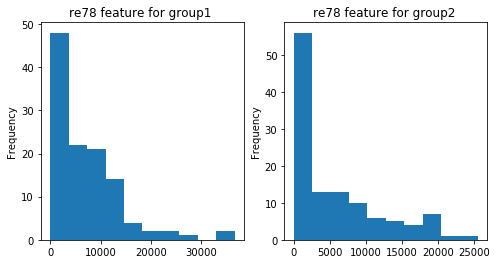

In [234]:
f,axis = plt.subplots(1,2,figsize=(8, 4))
df_groups.re78_g1.plot(ax=axis[0],kind='hist',title='re78 feature for group1 ')
df_groups.re78_g2.plot(ax=axis[1],kind='hist',title='re78 feature for group2 ')

We can easily see that the outcomes don't give us useful information except outliers to conclude.

### Compare features between the two groups (group1: treated, group2: control)

re74 mean for group1: 1752.9697250000002 
re74 mean for group2: 2796.650725603448

re75 mean for group1: 1135.0346702586205 
re75 mean for group2: 1867.4144060344827

age mean for group1: 25.56896551724138 
age mean for group2: 25.310344827586206

educ mean for group1: 10.413793103448276 
educ mean for group2: 10.21551724137931


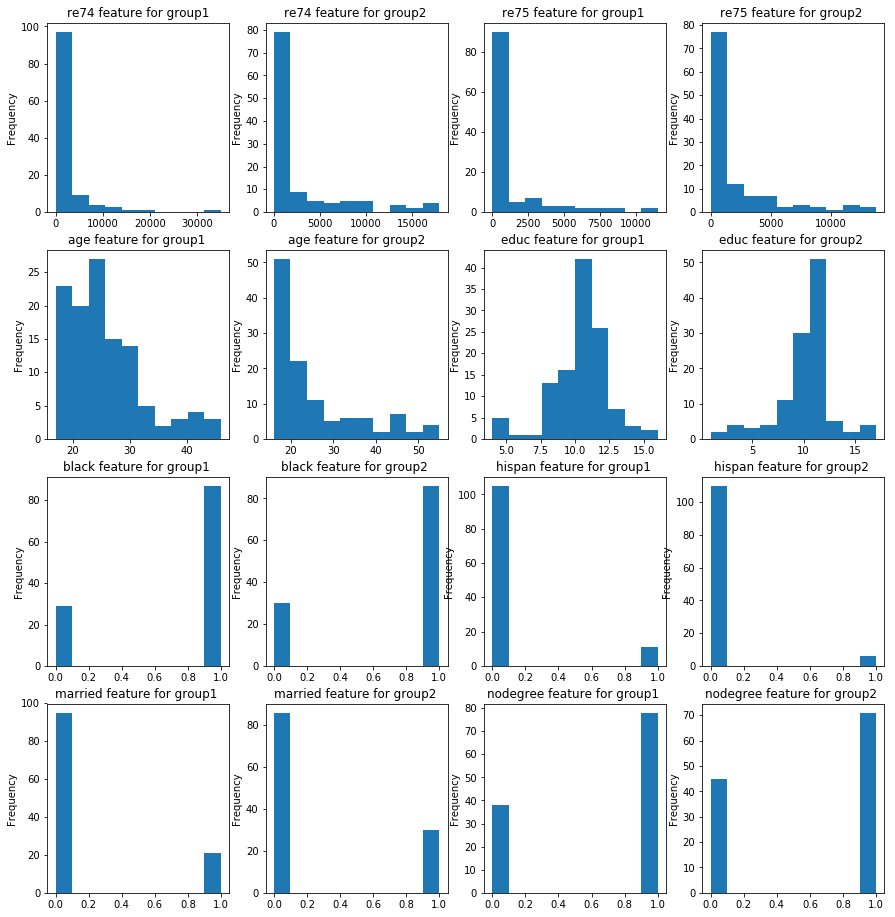

In [235]:
#print the mean for continuous features
print('re74 mean for group1:',df_groups.re74_g1.mean(),'\nre74 mean for group2:',df_groups.re74_g2.mean())
print('\nre75 mean for group1:',df_groups.re75_g1.mean(),'\nre75 mean for group2:',df_groups.re75_g2.mean())
print('\nage mean for group1:',df_groups.age_g1.mean(),'\nage mean for group2:',df_groups.age_g2.mean())
print('\neduc mean for group1:',df_groups.educ_g1.mean(),'\neduc mean for group2:',df_groups.educ_g2.mean())

f,axis = plt.subplots(4,4,figsize=(15, 16))

df_groups.re74_g1.plot(ax=axis[0,0],kind='hist',title='re74 feature for group1')
df_groups.re74_g2.plot(ax=axis[0,1],kind='hist',title='re74 feature for group2 ')

df_groups.re75_g1.plot(ax=axis[0,2],kind='hist',title='re75 feature for group1 ')
df_groups.re75_g2.plot(ax=axis[0,3],kind='hist',title='re75 feature for group2 ')

df_groups.age_g1.plot(ax = axis[1,0],kind='hist',title='age feature for group1 ')
df_groups.age_g2.plot(ax = axis[1,1],kind='hist',title='age feature for group2')

df_groups.educ_g1.plot(ax=axis[1,2],kind='hist',title='educ feature for group1 ')
df_groups.educ_g2.plot(ax=axis[1,3],kind='hist',title='educ feature for group2 ')

df_groups.black_g1.plot(ax=axis[2,0],kind='hist',title='black feature for group1 ')
df_groups.black_g2.plot(ax=axis[2,1],kind='hist',title='black feature for group2 ')

df_groups.hispan_g1.plot(ax=axis[2,2],kind='hist',title='hispan feature for group1 ')
df_groups.hispan_g2.plot(ax=axis[2,3],kind='hist',title='hispan feature for group2 ')

df_groups.married_g1.plot(ax=axis[3,0],kind='hist',title='married feature for group1 ')
df_groups.married_g2.plot(ax=axis[3,1],kind='hist',title='married feature for group2 ')

df_groups.nodegree_g1.plot(ax=axis[3,2],kind='hist',title='nodegree feature for group1 ')
df_groups.nodegree_g2.plot(ax=axis[3,3],kind='hist',title='nodegree feature for group2 ')






It seems that all features are proportional (same amount) in the two groups except black feature. Hence, we need to redo the matching to obtain a more balanced one.

## 1.5 Balancing the groups further


As seen in the previous question, the dataset is not balanced, we have to balance black feature.

In order to achieve this goal, we need to lower the number of black people in the treated group. This is done simply by dropping rows that match this category.

We have to ramdomize this step to have better results(see "Design of Observational Studies" book) by using *sample* method to select the rows to drop.

In [253]:
# drop rows to balance the dataset. The number of rows that are dropped is the difference of the number of black people
# between the two groups

new_df = df.copy()
new_df = df.drop(df[(df.black == 1) & (df.treat == 1)].sample(len(df[(df.black == 1) & (df.treat == 1)])\
                                                    -len(df[(df.black == 1) & (df.treat == 0)])).index.values)\
                                                    .reset_index().drop('index',axis=1)



We redo our matching (same steps as 1.4)

In [243]:
# create treated and control groups
control = list(new_df.loc[np.where(new_df["treat"] ==0)[0],'id'])
treated  = list(new_df.loc[np.where(new_df["treat"] ==1)[0],'id'])

In [244]:
##create a bipartite graph with treated and control groups as nodes
##add weighted edges: the weight is minus the absolute propensity-score differences 
 #between the two nodes

B = nx.Graph()
B.add_nodes_from(control, bipartite = 0)
B.add_nodes_from(treated, bipartite = 1)

for i in range(len(treated)):
    u = treated[i]
    for j in range(len(control)):
        v = control[j]
        w = abs(list(new_df.loc[np.where(new_df['id'] == u)[0],'propensityScore'])[0] \
                - list(new_df.loc[np.where(new_df['id'] == v)[0],'propensityScore'])[0])
        B.add_edge(u,v,weight = -w)

In [245]:
#find the matching
matching = nx.max_weight_matching(B,True)
#matching

In [246]:
# build a dataframe with the matching dictionnary
# Remember that group1 is the treated group and group2 is the control one.
matching_df = pd.DataFrame.from_dict(matching, orient='index')
matching_df = matching_df.reset_index()
matching_df.columns=['group1','group2']

g1= []
g2= []
  
for i in range(0,len(matching_df),2):
    u = matching_df.loc[i,'group1']
    v = matching_df.loc[i,'group2']
    group(u,g1,g2)
    group(v,g1,g2)
    
df_groups = pd.DataFrame()
df_groups['group1'] = g1
df_groups['group2'] = g2

#add the outcome and the features to each individual 
df_groups = build_df(new_df,df_groups, 're78')
df_groups = build_df(new_df,df_groups, 're74')
df_groups = build_df(new_df,df_groups, 're75')
df_groups = build_df(new_df,df_groups, 'age')
df_groups = build_df(new_df,df_groups, 'educ')
df_groups = build_df(new_df,df_groups, 'black')
df_groups = build_df(new_df,df_groups, 'hispan')
df_groups = build_df(new_df,df_groups, 'married')
df_groups = build_df(new_df,df_groups, 'nodegree')

Let's visualize the features again.

re74 mean for group1: 2104.1887887931034 
re74 mean for group2: 2903.9712859482747

re75 mean for group1: 1321.227651293104 
re75 mean for group2: 1773.6231241379305

age mean for group1: 24.870689655172413 
age mean for group2: 25.24137931034483

educ mean for group1: 10.39655172413793 
educ mean for group2: 10.060344827586206


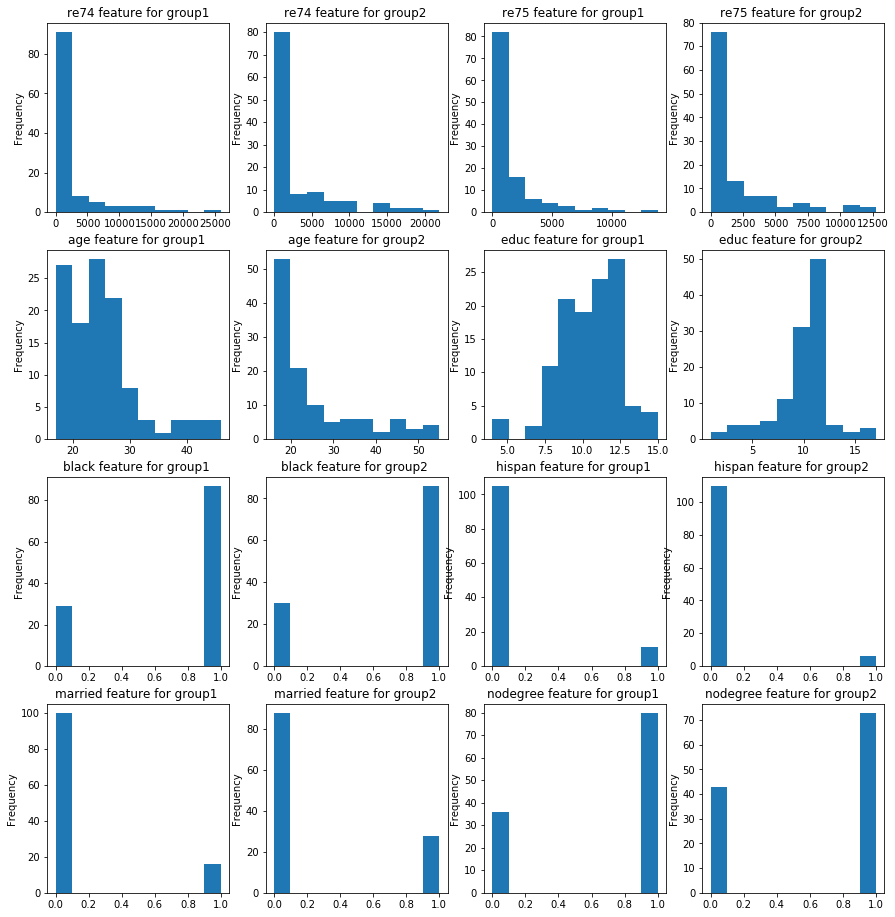

In [252]:
#print the mean for continuous features
print('re74 mean for group1:',df_groups.re74_g1.mean(),'\nre74 mean for group2:',df_groups.re74_g2.mean())
print('\nre75 mean for group1:',df_groups.re75_g1.mean(),'\nre75 mean for group2:',df_groups.re75_g2.mean())
print('\nage mean for group1:',df_groups.age_g1.mean(),'\nage mean for group2:',df_groups.age_g2.mean())
print('\neduc mean for group1:',df_groups.educ_g1.mean(),'\neduc mean for group2:',df_groups.educ_g2.mean())

f,axis = plt.subplots(4,4,figsize=(15, 16))

df_groups.re74_g1.plot(ax=axis[0,0],kind='hist',title='re74 feature for group1')
df_groups.re74_g2.plot(ax=axis[0,1],kind='hist',title='re74 feature for group2 ')

df_groups.re75_g1.plot(ax=axis[0,2],kind='hist',title='re75 feature for group1 ')
df_groups.re75_g2.plot(ax=axis[0,3],kind='hist',title='re75 feature for group2 ')

df_groups.age_g1.plot(ax = axis[1,0],kind='hist',title='age feature for group1 ')
df_groups.age_g2.plot(ax = axis[1,1],kind='hist',title='age feature for group2')

df_groups.educ_g1.plot(ax=axis[1,2],kind='hist',title='educ feature for group1 ')
df_groups.educ_g2.plot(ax=axis[1,3],kind='hist',title='educ feature for group2 ')

df_groups.black_g1.plot(ax=axis[2,0],kind='hist',title='black feature for group1 ')
df_groups.black_g2.plot(ax=axis[2,1],kind='hist',title='black feature for group2 ')

df_groups.hispan_g1.plot(ax=axis[2,2],kind='hist',title='hispan feature for group1 ')
df_groups.hispan_g2.plot(ax=axis[2,3],kind='hist',title='hispan feature for group2 ')

df_groups.married_g1.plot(ax=axis[3,0],kind='hist',title='married feature for group1 ')
df_groups.married_g2.plot(ax=axis[3,1],kind='hist',title='married feature for group2 ')

df_groups.nodegree_g1.plot(ax=axis[3,2],kind='hist',title='nodegree feature for group1 ')
df_groups.nodegree_g2.plot(ax=axis[3,3],kind='hist',title='nodegree feature for group2 ')




The dataset seems to be well balanced now. We observe that our selection balances the number of black people in both groups.

# 2.1 20newsgroup TF-IDF Features

In [ ]:
data_news = fetch_20newsgroups(subset='all')

We will use the provided Pipeline functionalty of scikit learn to apply the Machine Learning.  
In this pipeline the input data will first be put into the TfidfVectorizer in order to reduce the importance of very frequent words.  
After that, a random forest will be trained on the dataset.  

In [ ]:
# Split into train and test (90:10) since we are using cross validation
data_news_train_x, data_news_test_x, data_news_train_y, data_news_test_y = train_test_split(\
                                        data_news.data, data_news.target, test_size=0.1, random_state=42)
print("train n: {}, test n: {}".format(len(data_news_train_x), len(data_news_test_x)))

We are splitting the dataset into a training (90%) and a testing set (10%).  
Since we are using cross validation in the scikit grid search an extra validataion set is not required.  
Cross validation splits the data into k different sets, trains k classifiers on k-1 parts and validates the sets on the not used set for training. Therefore the whole dataset can be used for training and validataion at once, which improves accuracy, since more data is available.

In [ ]:
# Set up pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rfc', RandomForestClassifier()),
])

parameters = {
    'rfc__n_estimators' : (100,150,200),    
    'rfc__max_depth' : (100,200,300,None)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1) 

Previous runs with lower values for both parameters have already shown, that parameters lower that 100 perform worse.  
Therefore we excluded them for further grid searches.  
Grid searches for higher parameters took too long and were aborted.

In [ ]:
# Run training with grid search
# Perform grid search with corss-validation
grid_search.fit(data_news_train_x, data_news_train_y)

print("Best score: {:0.3f}".format(grid_search.best_score_))
print("Best parameters:")
best_parameters = grid_search.best_estimator_.get_params()
for param in parameters.keys():
    print("\t{}: {}".format(param, best_parameters[param]))
    
clf = grid_search.best_estimator_

In [ ]:
# Test with test set
data_news_test_y_pred = clf.predict(data_news_test_x)
conf_mat = confusion_matrix(data_news_test_y_pred, data_news_test_y)

# create data frame with category names
df_matrix = pd.DataFrame(conf_mat, columns=data_news.target_names)
df_matrix

The diagonal of the confusion matrix contains the highest values. This shows that the most articles were classified in the correct categories.  
The classification for the category `soc.religion.christian` was the imprecisest, many articles were classified as `talk.religion.misc`.  
Other outliers belong to similar categories, too: `alt.atheism` as `talk.religion.misc` or `comp.os.ms-windows.misc` as `comp.sys.ibm.pc.hardware`.  
Therefore the model seems to fit well.

In [ ]:
# get feature importance
feature_importance = clf.steps[1][1].feature_importances_

# get created dictionary from Vectorizer and map id to word
vocabulary = clf.steps[0][1].vocabulary_
voc_array = [None] * len(vocabulary.keys())
for key,val in vocabulary.items():
    voc_array[val] = key
voc_importance = np.asarray([voc_array, feature_importance]).T

# create dataframe with aquired information
df_voc = pd.DataFrame(voc_importance, columns=["word", "importance"])
df_voc['importance'] = pd.to_numeric(df_voc['importance'])
df_voc_top = df_voc.sort_values(by=['importance'], ascending=False).head(10)
df_voc_top

The feature importance in general is very low. This is caused by the total amount of features.  
Words like `windows`, `bike` or `car` are one of the most important features and can give an indication for the category.  
However, also words like `of`, `the` or `in` are in the top features which cannot help to classify the document.